In [24]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import WS_auxdigit as WSAL



# for plotting
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import seaborn as sns
sns.set()

> 0 if first > second else 1

## Weight Sharing and Auxilary Loss Digit

Use simamiese newtwork and weight sharing for prediction as well as a custom loss function. The Network predicts a the value of the digit. The loss is then computed on the sum of the loss of the prediction of the first value, the second value and if the first is higher than the second value.

In [25]:
with open(f'data.p', 'rb') as f:
    train_input, train_target, train_classes,val_input,test_input,val_target,test_target,val_classes,test_classes = pickle.load(f)

In [78]:
torch.manual_seed(42)
losses, losses_val, accuracies_train, accuracies_test, accuracies_val,all_classified,misclassified,which  = WSAL.train_all(train_input, train_target, 
                                                                                            train_classes,val_input,
                                                                                            val_target, val_classes, 
                                                                                            test_input, test_target, test_classes)

--------------------------------------------------  
 Iteration 0 
 
Training accuracy is 0.979 
Validation accuracy is 0.948 
--------------------------------------------------  
 Iteration 1 
 
Training accuracy is 0.982 
Validation accuracy is 0.96 
--------------------------------------------------  
 Iteration 2 
 
Training accuracy is 0.982 
Validation accuracy is 0.962 
--------------------------------------------------  
 Iteration 3 
 
Training accuracy is 0.979 
Validation accuracy is 0.94 
--------------------------------------------------  
 Iteration 4 
 
Training accuracy is 0.971 
Validation accuracy is 0.942 
--------------------------------------------------  
 Iteration 5 
 
Training accuracy is 0.982 
Validation accuracy is 0.948 
--------------------------------------------------  
 Iteration 6 
 
Training accuracy is 0.981 
Validation accuracy is 0.958 
--------------------------------------------------  
 Iteration 7 
 
Training accuracy is 0.987 
Validation accur

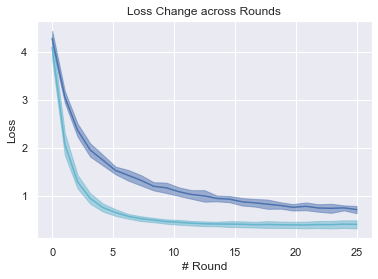

In [79]:
plt.figure()
plotloss((losses/10).T,color= 'b')
plotloss(losses_val.T,'c')
plt.show()

### Evaluation of model performance

In [80]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9800 ± 0.0000 


In [81]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.9577 ± 0.0001 


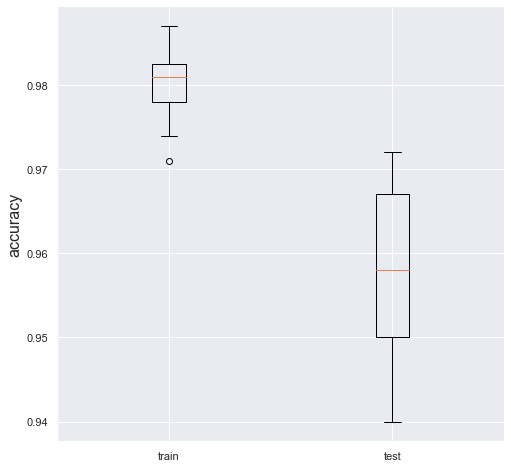

In [82]:
plot_performance(accuracies_train,accuracies_test)

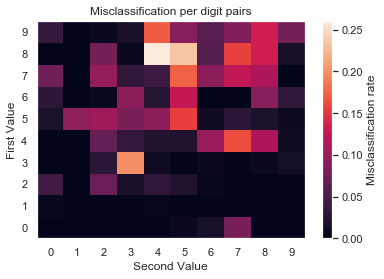

In [93]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
heatmap,fig = plot_heatmap(misclassified,all_classified)

In [94]:
fig.savefig('Plots/digit_heatmap.png', bbox_inches='tight')

In [84]:
import pickle
with open(f'produced/digit_accuracy.p', 'wb') as f:
    pickle.dump(accuracies_test ,f)

In [85]:
with open(f'produced/digit_heatmap.p', 'wb') as f:
    pickle.dump(heatmap ,f)